<a href="https://colab.research.google.com/github/yoyoboom/python-exercise-1-4/blob/master/Python_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv(open('drive/My Drive/Travel Pony Facebook.csv', 'rb'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df.tail(10)

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
3695,2013-06-28,2013-06-28,Bob Jackson,Travelpony-Page Likes-US-13-65,702,1.004274,705,1,1,7.04,1,1,0,0,0,0,0,0,7.04,7.040000
3696,2013-06-27,2013-06-27,Bob Jackson,Travelpony-Page Likes-US-13-65,1143,1.699913,1943,3,3,4.31,0,0,0,0,0,0,0,0,0.00,0.000000
3697,2013-06-14,2013-06-14,Bob Jackson,Ad 1,54,1.037037,56,0,0,0.18,0,0,0,0,0,0,0,0,0.00,0.000000
3698,2013-06-13,2013-06-13,Bob Jackson,Ad 1,513,1.000000,513,4,3,1.97,1,3,2,2,0,0,0,0,1.97,0.656667
3699,2013-06-12,2013-06-12,Bob Jackson,Ad 1,342,1.000000,342,0,0,1.00,0,0,0,0,0,0,0,0,0.00,0.000000
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.00,0.990000
3703,2013-06-08,2013-06-08,Bob Jackson,Ad 1,143,1.000000,143,3,3,0.95,0,3,3,3,0,0,0,0,0.00,0.316667
3704,2013-06-07,2013-06-07,Bob Jackson,Ad 1,4711,1.087243,5122,1,1,2.25,0,0,0,0,0,0,0,0,0.00,0.000000


In [0]:
# remove all zeros
new = df[df['Amount Spent (USD)'] != 0]

In [0]:
new

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.00,0.990000
3703,2013-06-08,2013-06-08,Bob Jackson,Ad 1,143,1.000000,143,3,3,0.95,0,3,3,3,0,0,0,0,0.00,0.316667


# Question 1


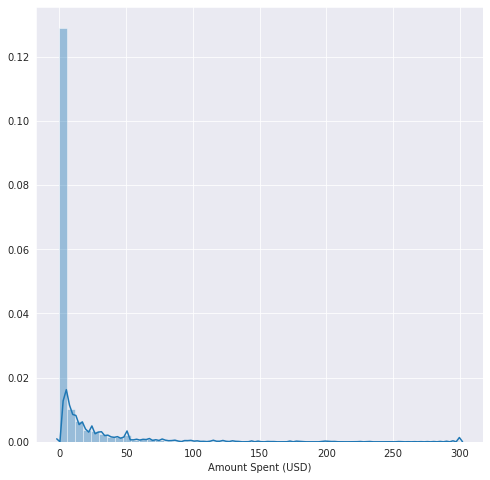

In [0]:
# Plot histogram/scatterplots
fig, new2 = plt.subplots()
fig.set_size_inches(8,8)
sns.set_style('darkgrid')
new2 = sns.distplot(df['Amount Spent (USD)'])

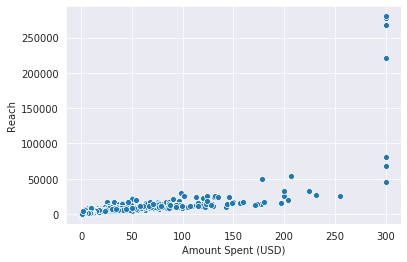

In [0]:
# Plot histogram/scatterplots in terms of reach
r1 = sns. scatterplot(x = 'Amount Spent (USD)', y ='Reach', data=new)

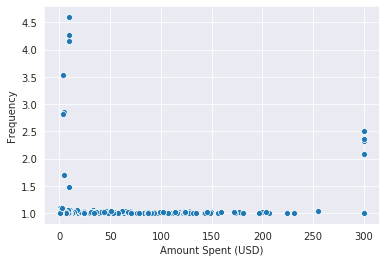

In [0]:
# Plot histogram/scatterplots in terms of frequency
f1 = sns. scatterplot(x = 'Amount Spent (USD)', y ='Frequency', data=new)

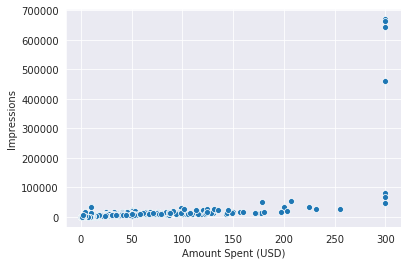

In [0]:
# Plot histogram/scatterplots in terms of impressions
i1 = sns. scatterplot(x = 'Amount Spent (USD)', y ='Impressions', data=new)

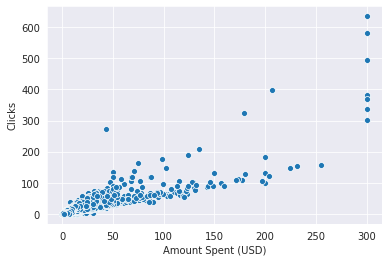

In [0]:
# Plot histogram/scatterplots in terms of clicks
c1 = sns. scatterplot(x = 'Amount Spent (USD)', y ='Clicks', data=new)

# Question 2
Build multiple regressions



In [0]:
# data types
new.dtypes

Start Date                         object
End Date                           object
Account                            object
Campaign Name                      object
Reach                               int64
Frequency                         float64
Impressions                         int64
Clicks                              int64
Unique Clicks                       int64
Amount Spent (USD)                float64
Page Likes                          int64
Page Engagement                     int64
Post Engagement                     int64
Post Likes                          int64
Post Comments                       int64
Post Shares                         int64
Photo Views                         int64
Website Clicks                      int64
Cost per Page Like (USD)          float64
Cost per Page Engagement (USD)    float64
dtype: object

In [0]:
# new loc
new.loc[new['Campaign Name'].str.contains('Nanigans', case=False), 'Campaign Name'] = 'Nanigans'
new.loc[new['Campaign Name'].str.contains('TravelPony', case=False), 'Campaign Name'] = 'TravelPony'
new.loc[new['Campaign Name'].str.contains('Simple'), 'Campaign Name'] = 'Simple_Multi_Fill_Campaign'
new.loc[new['Campaign Name'].str.contains('Ad'), 'Campaign Name'] = 'Ad'
new.loc[new['Campaign Name'].str.contains('Post'), 'Campaign Name'] = 'Post'

In [0]:
# new dummies
new_cam = pd.get_dummies(new['Campaign Name'])
new3=new[['Reach', 'Frequency', 'Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views', 'Website Clicks']]
ind = pd.concat([new3, new_cam], axis = 1)

In [0]:
ind

,Reach,Frequency,Impressions,Clicks,Unique Clicks,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Ad,Cyber Weekend,Nanigans,Post,Simple_Multi_Fill_Campaign,TravelPony
0,278117,2.314303,643647,336,313,3,246,243,0,0,0,0,243,0,1,0,0,0,0
1,221255,2.079090,460009,376,348,6,215,209,0,0,0,0,209,0,1,0,0,0,0
2,267915,2.499069,669538,383,345,2,252,250,0,0,0,0,250,0,1,0,0,0,0
3,280332,2.365406,663099,301,275,3,257,254,0,0,0,0,254,0,1,0,0,0,0
4,14269,1.000420,14275,64,61,2,14,12,0,0,0,0,12,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,298,1.003356,299,2,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0
3701,514,1.060311,545,3,3,0,3,3,3,0,0,0,0,1,0,0,0,0,0
3702,111,1.000000,111,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0
3703,143,1.000000,143,3,3,0,3,3,3,0,0,0,0,1,0,0,0,0,0


In [0]:
# regression analysis
target = new['Amount Spent (USD)']
#ind = new[['Reach', 'Frequency', 'Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views', 'Website Clicks']]
mode = sm.OLS(target,ind)
res = mode.fit()

In [0]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:43:02   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Reach               

# Question 3
Coefficient for each predictors variables

In [0]:
summary = []

In [0]:
summary = pd.concat([res.params, res.pvalues, ], axis = 1)
summary.columns = ['Coef', 'pvalues']
summary = summary[summary['pvalues'] <= 0.05].sort_values('Coef', ascending = False)
summary['Rank'] = summary['Coef'].rank(ascending=0).astype(int)

In [0]:
summary

,Coef,pvalues,Rank
Page Likes,24.450740,9.059883e-03,1
Post Engagement,18.024142,2.090729e-02,2
Post Shares,4.933423,1.920459e-03,3
Post Comments,3.594876,2.731019e-02,4
Website Clicks,3.564398,2.265358e-02,5
Photo Views,3.321407,3.363899e-02,6
Unique Clicks,0.515465,5.180673e-05,7
Reach,0.003310,4.302627e-87,8
Impressions,-0.000853,1.482248e-23,9
Clicks,-0.385926,6.578548e-04,10


In [0]:
# biggest in terms of coef
summary['Coef'].nlargest(3)

Page Likes         24.450740
Post Engagement    18.024142
Post Shares         4.933423
Name: Coef, dtype: float64